In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data_dir = "./data"

In [3]:
data = pd.read_json(os.path.join(data_dir, "dessert.json"))

## Data inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            392 non-null    int64 
 1   description   392 non-null    object
 2   tags          392 non-null    object
 3   manufacturer  254 non-null    object
 4   type          390 non-null    object
 5   portions      392 non-null    object
 6   nutrients     392 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.6+ KB


In [5]:
data.isnull().sum()

id                0
description       0
tags              0
manufacturer    138
type              2
portions          0
nutrients         0
dtype: int64

In [6]:
data.shape

(392, 7)

In [7]:
data.columns

Index(['id', 'description', 'tags', 'manufacturer', 'type', 'portions',
       'nutrients'],
      dtype='object')

In [8]:
data.head()

,id,description,tags,manufacturer,type,portions,nutrients
0,18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
1,18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
2,18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
3,18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
4,18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


In [9]:
# set index because there is already a valid id
data = data.set_index("id")
data.head()

,description,tags,manufacturer,type,portions,nutrients
id,,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


## Exercise 1

### 1 a)

In [10]:
#Check for empty values in the manufacturer column
(data["manufacturer"] == "").sum()

173

In [11]:
#Transform empty type values of manufacturer to None
data.loc[data.manufacturer == "", "manufacturer"] = None
(data["manufacturer"] == "").sum()

0

In [12]:
#Check values in the type column
data.type.value_counts()

Cake                108
Cookies              86
Sweet Bread          61
Savory Bread         41
Toaster Pastries     25
Biscuits             24
Muffins              17
Sweet bread           9
Puff Pastry           5
Sweet Breads          3
Cream Puff            3
Coookies              2
Biscuit               1
Muesli                1
Savory bread          1
Muffin                1
sweet bread           1
Cookie                1
Name: type, dtype: int64

In [13]:
#transform troublesome type values
data.loc[data.type.isin(["Coookies", "Cookie"]), "type"] = "Cookies"
data.loc[data.type.isin(["Sweet bread", "sweet bread", "Sweet Breads"]), "type"] = "Sweet Bread"
data.loc[data.type == "Savory bread", "type"] = "Savory Bread"
data.loc[data.type == "Biscuit", "type"] = "Biscuits"
data.loc[data.type == "Muffin", "type"] = "Muffins"

In [14]:
data.type.value_counts()

Cake                108
Cookies              89
Sweet Bread          74
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

In [15]:
#Check values in the tags column
data.tags.value_counts()

[]                               388
[Latino food]                      2
[Include commodity code B367]      1
[Include commodity code B368]      1
Name: tags, dtype: int64

In [16]:
# drop the column "tags" because because it contains too little information (just 4 entries)
data = data.drop('tags', axis=1)
data.head()

,description,manufacturer,type,portions,nutrients
id,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


In [17]:
#Look for empty values in type
for value in data["type"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string
    

None: Missing
None: Missing


In [18]:
# look at data with type None
data.loc[data["type"].isnull()]

,description,manufacturer,type,portions,nutrients
id,,,,,
18048,Raisin bread (toasted),None,None,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 8.6, 'units': 'g', 'description': '..."
18642,"GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow...",General Mills Inc.,None,"[{'amount': 1, 'unit': 'serving', 'grams': 43.0}]","[{'value': 3.8, 'units': 'g', 'description': '..."


In [19]:
print(data.at[18048,"description"])

Raisin bread (toasted)


In [20]:
print(data.at[18642,"description"])

GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow Cake Mix, dry


In [21]:
# Set missing type for empty type values
data.at[18048,"type"] = "Sweet Bread"
data.at[18642,"type"] = "Cake"

In [22]:
#Look for empty values in nutrients
for value in data["nutrients"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [23]:
#Look for empty values in portions

for value in data["portions"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string


[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])


In [24]:
#Delete rows where the portions column is empty
#for value in data["portions"]:
#    if not value:
#        data = data.loc[data["portions"][value]]

In [25]:
#We parse the portions column and create a separate DataFrame for it, since it contains nested data
#We also store the id of the associated row, so as not to lose the information to which the portions were related to
portions_list = []
portions_row = []
data_id = data.index[0]

#Loop through the portions column and create one portions_row for each list in each row of data
for array in data['portions'].values:
    for list_of_portions in array:
        portions_row = []
        portions_row.append(data_id)
        for key in list_of_portions:
            portions_row.append(list_of_portions[key])

        portions_list.append(portions_row)
    
    data_id = data_id+1
    
#Create the DataFrame from the list
portions = pd.DataFrame(portions_list, columns = ['id', 'amount', 'unit', 'grams'])
portions

,id,amount,unit,grams
0,18011,1,oz,28.35
1,18012,1,oz,28.35
2,18012,2,biscuit (2 dia),23.00
3,18013,1,oz,28.35
4,18013,2,biscuit (2-1/4 dia),21.00
...,...,...,...,...
748,18400,1,waffles round,70.00
749,18401,1,serving (approximate serving size),55.00
750,18401,2,cake square (average weight of whole item),399.00
751,18402,1,serving,55.00


In [26]:
#We also parse the nutrients column in the same way we did the portions column
nutrients_list = []
nutrients_row = []
data_id = data.index[0]

for array in data['nutrients'].values:
    for list_of_portions in array:
        nutrients_row = []
        nutrients_row.append(data_id)
        for key in list_of_portions:
            nutrients_row.append(list_of_portions[key])

        nutrients_list.append(nutrients_row)
    
    data_id = data_id+1
    
nutrients = pd.DataFrame(nutrients_list, columns = ['id', 'value', 'units', 'description', 'type'])
nutrients

,id,value,units,description,type
0,18011,7.300,g,Protein,Composition
1,18011,12.100,g,Total lipid (fat),Composition
2,18011,48.400,g,"Carbohydrate, by difference",Composition
3,18011,3.300,g,Ash,Other
4,18011,335.000,kcal,Energy,Energy
...,...,...,...,...,...
21545,18402,4.411,g,"Fatty acids, total monounsaturated",Other
21546,18402,9.424,g,"Fatty acids, total polyunsaturated",Other
21547,18402,0.082,g,"Fatty acids, total trans-monoenoic",Other
21548,18402,0.078,g,"Fatty acids, total trans-polyenoic",Other


In [27]:
#Drop the portions and nutrients columns from data, as now there are separate DataFrames for them
data = data.drop('portions', axis=1)
data = data.drop('nutrients', axis=1)
data.head()

,description,manufacturer,type
id,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",None,Biscuits
18012,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18013,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18014,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18015,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits


In [28]:
for value in portions["amount"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [29]:
for value in portions["unit"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [30]:
for value in portions["grams"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

28.35: Not a Number
28.35: Not a Number
23.0: Not a Number
28.35: Not a Number
21.0: Not a Number
28.35: Not a Number
43.0: Not a Number
398.0: Not a Number
28.35: Not a Number
27.0: Not a Number
28.35: Not a Number
101.0: Not a Number
14.0: Not a Number
60.0: Not a Number
28.35: Not a Number
44.0: Not a Number
28.35: Not a Number
57.0: Not a Number
60.0: Not a Number
28.35: Not a Number
45.0: Not a Number
28.35: Not a Number
241.0: Not a Number
28.35: Not a Number
60.0: Not a Number
28.35: Not a Number
65.0: Not a Number
28.35: Not a Number
40.0: Not a Number
28.35: Not a Number
37.0: Not a Number
28.35: Not a Number
32.0: Not a Number
64.0: Not a Number
96.0: Not a Number
28.35: Not a Number
29.0: Not a Number
59.0: Not a Number
88.0: Not a Number
28.35: Not a Number
28.35: Not a Number
30.0: Not a Number
20.0: Not a Number
10.0: Not a Number
28.35: Not a Number
26.0: Not a Number
41.0: Not a Number
28.35: Not a Number
24.0: Not a Number
38.0: Not a Number
28.35: Not a Number
30.0: N

In [31]:
#Look for empty values in description
for value in data["description"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [32]:
 #Look for empty values in id
for value in data.index:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [33]:
data.sample(20, random_state=1)

,description,manufacturer,type
id,,,
18133,"Cake, sponge, commercially prepared",None,Cake
18258,"English muffins, plain, enriched, with ca prop...",None,Savory Bread
18563,"ARCHWAY Home Style Cookies, Gourmet Rocky Road",Archway Cookies,Cookies
18188,"Cookies, peanut butter, refrigerated dough, baked",None,Cookies
18938,"Toaster Pastries, fruit, frosted (include appl...",None,Toaster Pastries
18363,"Tortillas, ready-to-bake or -fry, corn",None,Savory Bread
18127,"Cake, snack cakes, creme-filled, chocolate wit...",None,Cake
18148,"Cheesecake prepared from mix, no-bake type",None,Cake
18131,"Cake, white, dry mix, special dietary (include...",None,Cake


### 1 b)

In [34]:
#General distribution of types
data.type.value_counts()

Cake                109
Cookies              89
Sweet Bread          75
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

In [35]:
#for type_of_dessert in data.type:
    #print(type_of_dessert)

for type_of_dessert in data.type:
    df = pd.DataFrame()
    df = data.loc[data.type == type_of_dessert]
    #print(df)

    
df.groupby("manufacturer").sum()


,description,type
manufacturer,,
General Mills Inc.,"GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow...",Cake
"Kellogg, Co.","KELLOGG, KELLOGG'S EGGO, Buttermilk Pancake",Cake
Pillsbury Co.,"PILLSBURY, Traditional Fudge Brownie Mix, dry",Cake
The J.M. Smucker Co.,"MARTHA WHITE FOODS, Martha White's Chewy Fudge...",Cake


In [36]:
df

,description,manufacturer,type
id,,,
18076,"Doughnut, whole-wheat, commercially prepared, ...",None,Cake
18086,"Cake, angelfood, commercially prepared",None,Cake
18087,"Cake, angelfood, dry mix",None,Cake
18088,"Cake, angelfood, dry mix, prepared",None,Cake
18090,"Cake, boston cream pie, commercially prepared",None,Cake
...,...,...,...
18945,"Pie crust, deep dish, frozen, unbaked, made wi...",None,Cake
18946,"Pie crust, refrigerated, regular, baked",None,Cake
18947,"Pie crust, deep dish, frozen, baked, made with...",None,Cake


### 1 c)

In [37]:
nutrients.describe()

,id,value
count,21550.000000,21542.000000
mean,18182.851090,73.234701
std,106.546397,919.628462
min,18011.000000,-88.000000
25%,18092.000000,0.167000
50%,18177.000000,0.800000
75%,18262.000000,15.000000
max,18402.000000,124300.000000


In [38]:
# extract just the vitamins from the nutrients
vitamins = nutrients[nutrients["type"]=="Vitamins"]
vitamins

,id,value,units,description,type
18,18011,999.00,IU,"Vitamin A, IU",Vitamins
19,18011,25.00,mcg,Retinol,Vitamins
20,18011,26.00,mcg_RAE,"Vitamin A, RAE",Vitamins
21,18011,0.40,mg,"Vitamin C, total ascorbic acid",Vitamins
22,18011,0.35,mg,Thiamin,Vitamins
...,...,...,...,...,...
21538,18402,0.07,mg,Thiamin,Vitamins
21539,18402,0.18,mg,Riboflavin,Vitamins
21540,18402,4.70,mg,Niacin,Vitamins
21541,18402,0.55,mg,Pantothenic acid,Vitamins


In [39]:
vitamins.units.value_counts()

mcg        3082
mg         2800
IU          538
mcg_RAE     316
mcg_DFE     308
Name: units, dtype: int64

In [40]:
# convert mcg to mg
vitamins.loc[vitamins.units == "mcg", "value"] = vitamins.value*0.001
vitamins.loc[vitamins.units == "mcg", "units"] = "mg"
vitamins.units.value_counts()

mg         5882
IU          538
mcg_RAE     316
mcg_DFE     308
Name: units, dtype: int64

In [41]:
# do a list with ids grouped by dessert types
dessert_types = []
ids = []
for dessert_type in data.type.unique():
    dessert_types.append(dessert_type)    

for dessert_type in data.type.unique():
    id_types = []
    for row in data.index:
        if data.loc[data.index == row,'type'].values[0] == dessert_type:
            id_types.append(row)

    ids.append(id_types)
    
print(ids)

[[18011, 18012, 18013, 18014, 18015, 18016, 18017, 18365, 18367, 18403, 18505, 18506, 18507, 18512, 18609, 18612, 18615, 18629, 18633, 18634, 18932, 18933, 18934, 18935, 18951], [18019, 18021, 18027, 18028, 18029, 18030, 18032, 18035, 18036, 18037, 18038, 18039, 18040, 18041, 18042, 18043, 18045, 18047, 18048, 18049, 18050, 18051, 18055, 18057, 18059, 18061, 18064, 18065, 18068, 18071, 18073, 18075, 18077, 18078, 18079, 18081, 18082, 18084, 18085, 18240, 18250, 18253, 18254, 18256, 18268, 18269, 18270, 18271, 18272, 18339, 18344, 18345, 18346, 18347, 18349, 18350, 18351, 18352, 18353, 18355, 18357, 18358, 18361, 18362, 18383, 18384, 18385, 18412, 18413, 18414, 18432, 18436, 18447, 18631, 18635], [18022, 18023, 18024, 18033, 18066, 18217, 18218, 18219, 18221, 18222, 18223, 18224, 18225, 18227, 18229, 18230, 18231, 18232, 18233, 18234, 18236, 18241, 18258, 18259, 18260, 18261, 18262, 18263, 18264, 18265, 18266, 18267, 18360, 18363, 18376, 18396, 18400, 18426, 18428, 18434, 18457, 18953],

In [42]:
# vitamins for type bisquits
index_list = ids[0]
vitamins_bisq = vitamins.loc[vitamins['id'].isin(index_list)]
values2 = vitamins_bisq["id"].value_counts()
print(values2)

18012    27
18013    27
18015    26
18014    23
18011    14
18017    14
18016    12
Name: id, dtype: int64


In [46]:
# calculate the median of vitamins for every dessert type
medians = []
for type in range(len(ids)):
    index_list = ids[type]
    vitamins_per_type = vitamins.loc[vitamins['id'].isin(index_list)]
    values = vitamins_per_type["id"].value_counts()       
    medians.append(values.median())
  


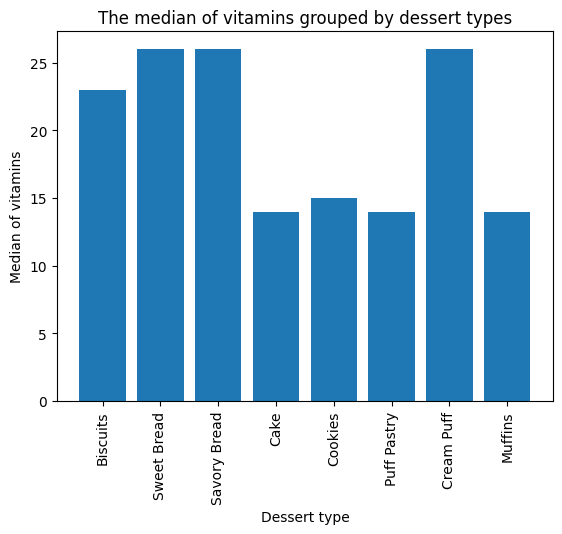

In [44]:
# plot the medians, Toaster Pastries and Muesli does not have any specified vitamins 
plt.bar(data.type.unique(),medians)
plt.xlabel('Dessert type')
plt.ylabel('Median of vitamins')
plt.title('The median of vitamins grouped by dessert types')
plt.xticks(rotation=90)
plt.show()